Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 3.63MB/s]


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412             Inflation
Date                 
2022-09-30  69.812630
2022-10-31  65.963240
2022-11-30  60.982084
2022-12-31  57.207498
2023-01-31  51.729686


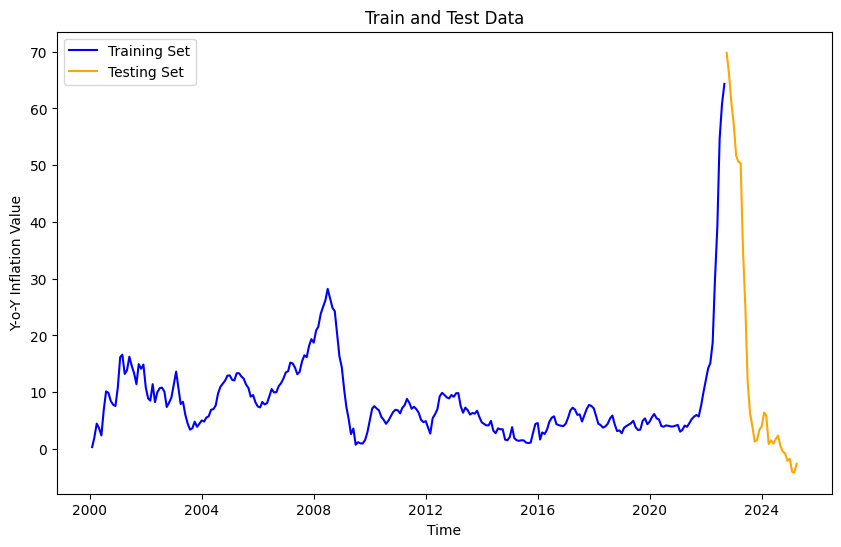

In [ ]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations


# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd

# Data download
import gdown
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"
output_file = "downloaded_file.xlsx"
gdown.download(download_url, output=output_file, quiet=False)

# Load dataset
data = pd.read_excel(output_file)
df = data.copy()


# Display column names
df.columns
df
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()

df.columns
!pip install optuna
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# ** SVR **

SVR Optimal Model contains :



```
2,Best C        Best Epsilon        Best Kernel 7.520171649        0.7035429656        linear,,,,
```


Final SVR Model (Lag=2)
RMSE: 3.6809, MSE: 13.5493, MAE: 2.3653, MAPE: 69.73%, R²: 0.9767


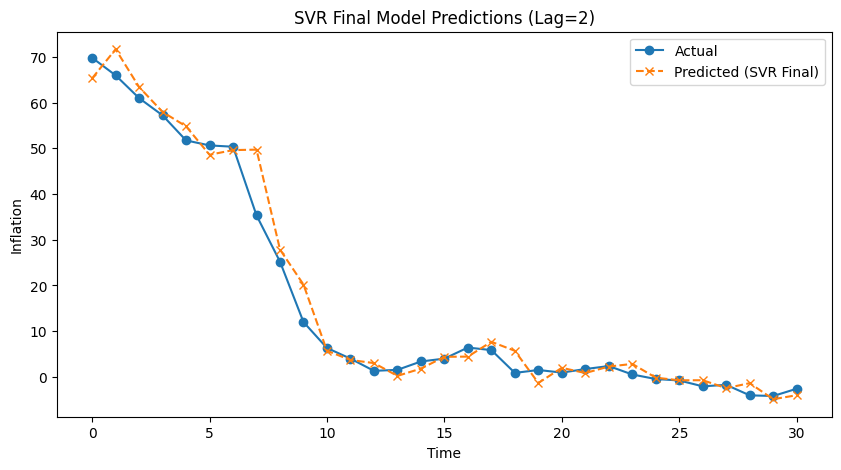

Next 12 Months Inflation Prediction using Final SVR Model:
            Predicted Inflation (SVR)
2025-04-30                  -1.602158
2025-05-31                  -0.914384
2025-06-30                  -0.381066
2025-07-31                   0.070978
2025-08-31                   0.477913
2025-09-30                   0.857674
2025-10-31                   1.219226
2025-11-30                   1.567108
2025-12-31                   1.903683
2026-01-31                   2.230238
2026-02-28                   2.547526
2026-03-31                   2.856033


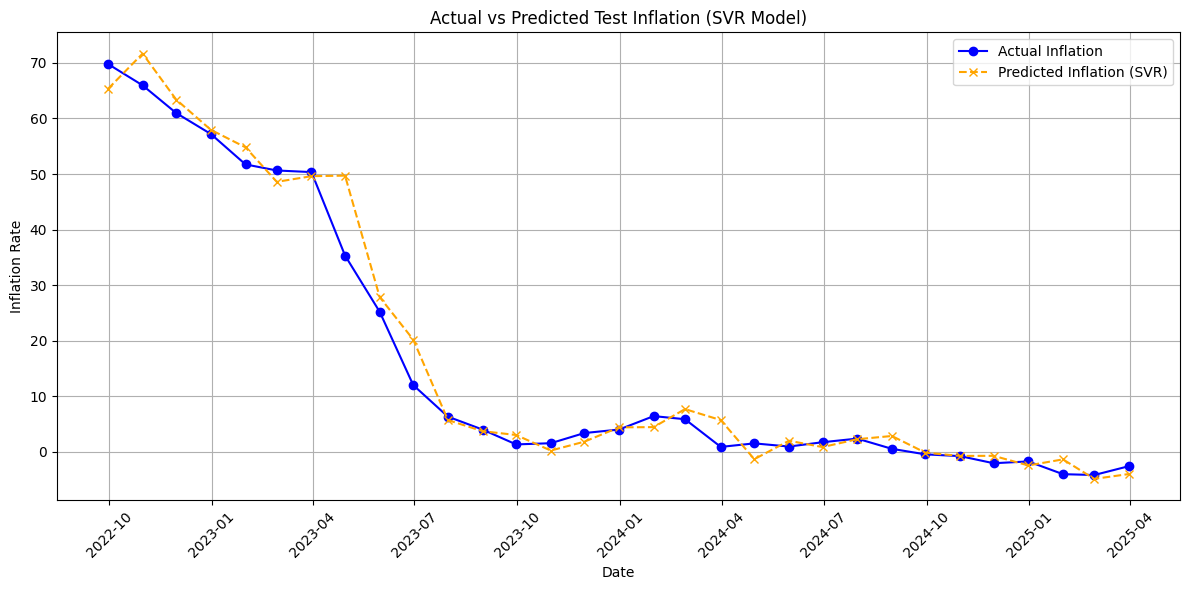

In [ ]:
# Refit SVR model using optimal parameters
# Set seeds
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


optimal_lag_svr = 2
optimal_C_svr = 7.520171649
optimal_epsilon_svr = 0.7035429656
optimal_kernel_svr = 'linear'

# Prepare lagged features
df_lagged_svr = df.copy()
for lag in range(1, optimal_lag_svr + 1):
    df_lagged_svr[f'Inflation_Lag_{lag}'] = df_lagged_svr['Inflation'].shift(lag)

# Drop missing values
df_lagged_svr.dropna(inplace=True)

# Split data
train_size_svr = int(0.9 * len(df_lagged_svr))
train_svr = df_lagged_svr[:train_size_svr]
test_svr = df_lagged_svr[train_size_svr:]

X_train_svr = train_svr[[f'Inflation_Lag_{lag}' for lag in range(1, optimal_lag_svr + 1)]]
y_train_svr = train_svr['Inflation']
X_test_svr = test_svr[[f'Inflation_Lag_{lag}' for lag in range(1, optimal_lag_svr + 1)]]
y_test_svr = test_svr['Inflation']

# Fit SVR with optimal parameters
svr_model_final = SVR(C=optimal_C_svr, epsilon=optimal_epsilon_svr, kernel=optimal_kernel_svr)
svr_model_final.fit(X_train_svr, y_train_svr)
y_pred_svr = svr_model_final.predict(X_test_svr)

# Evaluation metrics
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
mape_svr = np.mean(np.abs((y_test_svr - y_pred_svr) / y_test_svr)) * 100
r2_svr = r2_score(y_test_svr, y_pred_svr)

print(f"Final SVR Model (Lag={optimal_lag_svr})\nRMSE: {rmse_svr:.4f}, MSE: {mse_svr:.4f}, MAE: {mae_svr:.4f}, MAPE: {mape_svr:.2f}%, R²: {r2_svr:.4f}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_svr.values, label='Actual', marker='o')
plt.plot(y_pred_svr, label='Predicted (SVR Final)', linestyle='--', marker='x')
plt.title(f'SVR Final Model Predictions (Lag={optimal_lag_svr})')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.legend()
plt.show()


# Get the last actual values needed for lag features (SVR-specific)
last_actual_svr = df_lagged_svr['Inflation'].iloc[-optimal_lag_svr:].values.tolist()
recent_values_svr = last_actual_svr[::-1]  # reverse so most recent is first

future_preds_svr = []
future_index_svr = []

# Get the last index from your DataFrame (assumes DateTimeIndex)
last_index_svr = df_lagged_svr.index[-1]

# Loop to generate predictions for 12 future months using SVR
for i in range(12):
    # Prepare input features using the most recent values
    input_features_svr = np.array(recent_values_svr[:optimal_lag_svr]).reshape(1, -1)
    pred_svr = svr_model_final.predict(input_features_svr)[0]
    future_preds_svr.append(pred_svr)

    # Update recent values with the new prediction (for next iteration)
    recent_values_svr = [pred_svr] + recent_values_svr[:optimal_lag_svr - 1]

    # Generate index for the future month
   # next_month_svr = pd.date_range(start=last_index_svr, periods=13, freq='MS')[i + 1]
    next_month_svr = pd.date_range(start=last_index_svr, periods=13, freq='M')[i + 1]
    future_index_svr.append(next_month_svr)

# Create DataFrame of predictions (SVR-specific)
future_df_svr = pd.DataFrame({
    'Predicted Inflation (SVR)': future_preds_svr
}, index=future_index_svr)

print("Next 12 Months Inflation Prediction using Final SVR Model:")
print(future_df_svr)

import plotly.graph_objs as go
import plotly.offline as py

# Combine existing test data and predictions (SVR-specific)
full_actual_svr = y_test_svr.copy()
full_predicted_svr = pd.Series(y_pred_svr, index=y_test_svr.index)

# Append future predictions (SVR-specific)
future_pred_series_svr = pd.Series(future_preds_svr, index=future_index_svr)

# Create traces
trace_actual_svr = go.Scatter(x=full_actual_svr.index, y=full_actual_svr.values,
                              mode='lines+markers', name='Actual')

trace_predicted_svr = go.Scatter(x=full_predicted_svr.index, y=full_predicted_svr.values,
                                 mode='lines+markers', name='Predicted (Test Set)')

trace_future_svr = go.Scatter(x=future_pred_series_svr.index, y=future_pred_series_svr.values,
                               mode='lines+markers', name='Predicted (Next 12 Months)',
                               line=dict(dash='dash'))

# Combine all traces
data_svr = [trace_actual_svr, trace_predicted_svr, trace_future_svr]

# Layout settings
layout_svr = go.Layout(
    title=f'Inflation Predictions - Test Set & Next 12 Months (SVR Model)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Inflation'),
    hovermode='closest'
)

# Create figure
fig_svr = go.Figure(data=data_svr, layout=layout_svr)

# Show interactive plot
py.iplot(fig_svr)

future_df_svr_12=future_df_svr.copy()
future_df_svr_12
## Results ; Actual and SVR prediction
# Create a DataFrame with actual and predicted values
df_predictions_svr = pd.DataFrame({
    'Actual': y_test_svr,
    'Predicted (SVR Final)': y_pred_svr
}, index=y_test_svr.index)


df_predictions_svr

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(df_predictions_svr.index,
         df_predictions_svr['Actual'],
         label='Actual Inflation',
         marker='o',
         linestyle='-',
         color='blue')

# Predicted values from FNN
plt.plot(df_predictions_svr.index,
         df_predictions_svr['Predicted (SVR Final)'],
         label='Predicted Inflation (SVR)',
         marker='x',
         linestyle='--',
         color='orange')

# Formatting
plt.title('Actual vs Predicted Test Inflation (SVR Model)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Final SVR Model (Lag=2)
RMSE: 3.6809, MSE: 13.5493, MAE: 2.3653, MAPE: 69.73%, R²: 0.9767

RMSE: 3.6809, MSE: 13.5493, MAE: 2.3653, MAPE: 69.73%, R²: 0.9767

In [ ]:


# Prepare full lagged dataset for the entire period
df_lagged_full = df.copy()
for lag in range(1, optimal_lag_svr + 1):
    df_lagged_full[f'Inflation_Lag_{lag}'] = df_lagged_full['Inflation'].shift(lag)

# Drop rows with NaNs due to lagging
df_lagged_full.dropna(inplace=True)

# Features and target for the entire available data
X_full_svr = df_lagged_full[[f'Inflation_Lag_{lag}' for lag in range(1, optimal_lag_svr + 1)]]
y_full_svr = df_lagged_full['Inflation']

# Predict using the already trained SVR model
y_pred_full_svr = svr_model_final.predict(X_full_svr)

# Create DataFrame with actual and predicted values
df_predictions_full_svr = pd.DataFrame({
    'Actual Inflation': y_full_svr,
    'Predicted Inflation (SVR)': y_pred_full_svr
}, index=y_full_svr.index)

# Show the resulting DataFrame
print(df_predictions_full_svr.head())


            Actual Inflation  Predicted Inflation (SVR)
Date                                                   
2000-03-31          4.469678                   2.876899
2000-04-30          3.672022                   5.811305
2000-05-31          2.382412                   3.431154
2000-06-30          6.799835                   1.923575
2000-07-31         10.139831                   9.013867


In [ ]:
df_pred_svr=df_predictions_full_svr[['Predicted Inflation (SVR)']]

In [ ]:
df=df_pred_svr.copy()
df

,Predicted Inflation (SVR)
Date,
2000-03-31,2.876899
2000-04-30,5.811305
2000-05-31,3.431154
2000-06-30,1.923575
2000-07-31,9.013867
...,...
2024-11-30,-0.732178
2024-12-31,-2.463768
2025-01-31,-1.371525


Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 27.1MB/s]


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412             Inflation
Date                 
2022-09-30  69.812630
2022-10-31  65.963240
2022-11-30  60.982084
2022-12-31  57.207498
2023-01-31  51.729686


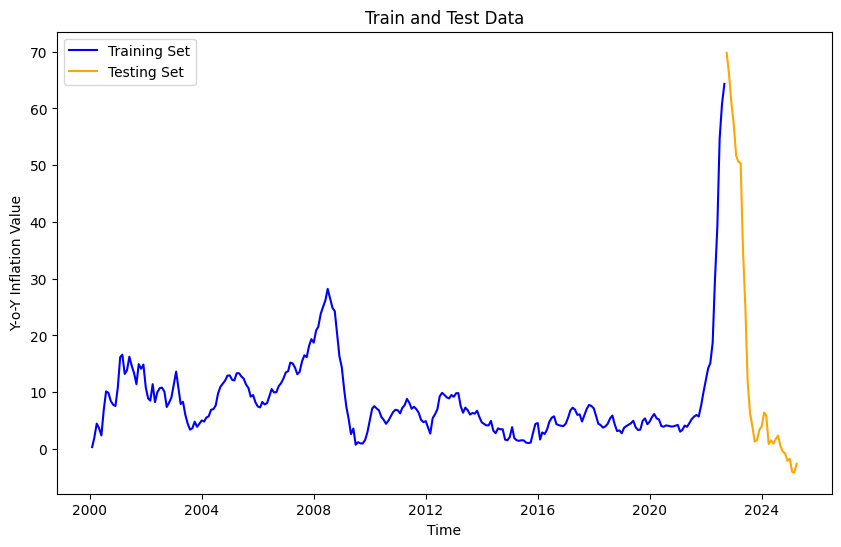


✅ Predictions and residuals saved to: SVR_Inflation_Predictions.xlsx


In [ ]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations


# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd

# Data download
import gdown
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"
output_file = "downloaded_file.xlsx"
gdown.download(download_url, output=output_file, quiet=False)

# Load dataset
data = pd.read_excel(output_file)
df = data.copy()


# Display column names
df.columns
df
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()

df.columns
!pip install optuna
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
# Set seeds
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

import pandas as pd

# Step 1: Prepare the entire dataset for prediction (with lag features)
df_all_lagged_svr = df.copy()
for lag in range(1, optimal_lag_svr + 1):
    df_all_lagged_svr[f'Inflation_Lag_{lag}'] = df_all_lagged_svr['Inflation'].shift(lag)

df_all_lagged_svr.dropna(inplace=True)

# Step 2: Prepare features for the full dataset
X_all_svr = df_all_lagged_svr[[f'Inflation_Lag_{lag}' for lag in range(1, optimal_lag_svr + 1)]]
y_all_svr = df_all_lagged_svr['Inflation']

# Step 3: Predict using the final SVR model
y_all_pred_svr = svr_model_final.predict(X_all_svr)

# Step 4: Create DataFrame with predictions and residuals
df_results_all_svr = pd.DataFrame({
    'Date': df_all_lagged_svr.index,
    'Actual Inflation': y_all_svr.values,
    'Predicted Inflation (SVR)': y_all_pred_svr,
    'Residuals': y_all_svr.values - y_all_pred_svr
})

# Step 5: Save to Excel
output_path = 'SVR_Inflation_Predictions.xlsx'
df_results_all_svr.to_excel(output_path, index=False)

print(f"\n✅ Predictions and residuals saved to: {output_path}")


# ** FNN **

Lag 3
{'input_units': 128, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.30000000000000004, 'optimizer': 'Adam', 'batch_size': 48, 'epochs': 70}


In [ ]:

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# LOADING THE DATASET
import gdown


# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd

# Data download
import gdown
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"
output_file = "downloaded_file.xlsx"
gdown.download(download_url, output=output_file, quiet=False)

# Load dataset
data = pd.read_excel(output_file)
df = data.copy()


# Display column names
df.columns
df
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)

Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 16.2MB/s]


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)


In [ ]:
df.columns

# Rename the column
df.rename(columns={'Predicted Inflation (SVR)': 'Inflation'}, inplace=True)

# Verify the result
print(df.head())


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412


In [1]:
import random
import numpy as np
import tensorflow as tf
import os

# Set seeds
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

df
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()

df.columns
!pip install optuna
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
data=df.copy()
data

data

df=data.copy()
df = df.astype(float)

# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df


# Number of lags to create
lags = 3
lagged_features = create_lagged_features(df, lags)

print("Original DataFrame:")
print(df)


print("\nDataFrame with Lagged Features:")
print(lagged_features)
print(lagged_features.columns)
df2=lagged_features.dropna()
print(df2)
len(df2)
df2.isnull().sum()
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
df2
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]
train_data
xtrain=train_data.drop(columns=['Inflation'])
xtest=test_data.drop(columns=['Inflation'])
train_data
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Inflation"]
ytest=test_data["Inflation"]
ytest
from sklearn.preprocessing import MinMaxScaler
xtrain.columns
ytrain
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''
xtrain
df1=pd.DataFrame(ytrain)
X_train_scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)
X_train_scaled_df
df3= pd.concat([df1, X_train_scaled_df], axis=1)

df3
X_train_scaled_df
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
## {'input_units': 128, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.30000000000000004, 'optimizer': 'Adam', 'batch_size': 48, 'epochs': 70}

# Define best hyperparameters manually
fnn_best_params = {
    'input_units': 128,
    'activation': 'tanh',
    'num_layers': 1,
    'n_units_0': 128,
    'dropout_rate_0': 0.30000000000000004,
    'optimizer': 'Adam',
    'batch_size': 48,
    'epochs': 70
}

# Build the final model
fnn_model = Sequential()

# Input layer
fnn_model.add(Dense(units=fnn_best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=fnn_best_params['activation']))

# Hidden layers
for i in range(fnn_best_params['num_layers']):
    fnn_units = fnn_best_params.get(f'n_units_{i}', 64)
    fnn_dropout = fnn_best_params.get(f'dropout_rate_{i}', 0.3)
    fnn_model.add(Dense(units=fnn_units, activation=fnn_best_params['activation']))
    fnn_model.add(Dropout(rate=fnn_dropout))

# Output layer
fnn_model.add(Dense(units=1))

# Optimizer
if fnn_best_params['optimizer'] == 'Adam':
    fnn_optimizer = Adam()
elif fnn_best_params['optimizer'] == 'SGD':
    fnn_optimizer = SGD()
else:
    fnn_optimizer = RMSprop()

# Compile model
fnn_model.compile(optimizer=fnn_optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit model
fnn_history = fnn_model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=fnn_best_params['batch_size'],
    epochs=fnn_best_params['epochs'],
    validation_split=0.1,
    verbose=1
)

# Evaluate model
fnn_final_loss, fnn_final_mae = fnn_model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"[FNN Model] Final Training Loss: {fnn_final_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(fnn_history.history['loss'], label='Training loss')
plt.plot(fnn_history.history['val_loss'], label='Validation loss')
plt.title('[FNN Model] Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on test data
fnn_test_predictions_scaled = fnn_model.predict(X_test_scaled)

# Inverse transform predictions and actual values
fnn_test_predictions = scaler_y.inverse_transform(fnn_test_predictions_scaled)
fnn_y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Evaluation Metrics
fnn_mse_fnn = mean_squared_error(fnn_y_test_original, fnn_test_predictions)
fnn_rmse_fnn  = np.sqrt(fnn_mse_fnn)
fnn_mae_fnn  = mean_absolute_error(fnn_y_test_original, fnn_test_predictions)
fnn_mape_fnn  = np.mean(np.abs((fnn_y_test_original - fnn_test_predictions) / fnn_y_test_original)) * 100
fnn_r2_fnn  = r2_score(fnn_y_test_original, fnn_test_predictions)

# Print results
print("[FNN Model] Test Results:")
print(f"MSE: {fnn_mse_fnn :.4f}")
print(f"RMSE: {fnn_rmse_fnn :.4f}")
print(f"MAE: {fnn_mae_fnn :.4f}")
print(f"MAPE: {fnn_mape_fnn :.2f}%")
print(f"R²: {fnn_r2_fnn :.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(fnn_y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(fnn_test_predictions, label="Predicted Values", linestyle='solid')
plt.title("[FNN Model] Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Inflation")
plt.legend()
plt.show()

fnn_y_test_original
len(ytest)
ytest
len(fnn_test_predictions)
len(fnn_y_test_original)
import pandas as pd

# Flatten the arrays to 1D
actual_values = fnn_y_test_original.ravel()
predicted_values = fnn_test_predictions.ravel()

# Create a DataFrame for the test set predictions
df_fnn_test_results = pd.DataFrame({
    'Actual Inflation': actual_values,
    'Predicted Inflation (FNN)': predicted_values
}, index=ytest.index)  # Keep the datetime index from ytest

# Display the DataFrame
print(df_fnn_test_results)
df_fnn_test_results
df_lagged_fnn=df2.copy()
# Number of lags used in your FNN model
optimal_lag_fnn = 3  # Change this to however many lags your FNN was trained on

# Get the last available actual inflation values to create lagged input
last_actual_fnn = df_lagged_fnn['Inflation'].iloc[-optimal_lag_fnn:].values.tolist()

# Reverse to have [Lag_1 (most recent), Lag_2, ...]
recent_values_fnn = last_actual_fnn[::-1]

# Prepare list to hold predictions and dates
future_preds_fnn = []
future_index_fnn = []

# Forecast next month (change range to >1 for multi-step forecasting)
for i in range(12):  # Change to range(2) for 2-month forecast   ####################################################
    input_features_fnn = np.array(recent_values_fnn[:optimal_lag_fnn]).reshape(1, -1)

    # Scale the input
    input_features_fnn_scaled = scaler_X.transform(input_features_fnn)

    # Predict next step
    pred_scaled = fnn_model.predict(input_features_fnn_scaled)
    pred = scaler_y.inverse_transform(pred_scaled)[0][0]

    # Store prediction
    future_preds_fnn.append(pred)

    # Update recent_values_fnn for recursive prediction
    recent_values_fnn = [pred] + recent_values_fnn[:optimal_lag_fnn - 1]

    # Update future index
    last_index_fnn = df_lagged_fnn.index[-1]
    future_index_fnn.append(pd.date_range(start=last_index_fnn, periods=13, freq='M')[i + 1]) ################################

# Create forecast DataFrame
future_preds_fnn = pd.DataFrame({
    'Predicted Inflation (FNN)': future_preds_fnn
}, index=future_index_fnn)

print("Next One Month Inflation Prediction using Final FNN Model:")
print(future_preds_fnn)


NameError: name 'df' is not defined

[FNN Model] Test Results:
MSE: 10.3534
RMSE: 3.2177
MAE: 2.0722
MAPE: 71.20%
R²: 0.9794

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# 1. Plot Actual Inflation values
fig.add_trace(go.Scatter(
    x=ytest.index,
    y=actual_values,
    mode='lines+markers',
    name='Actual Inflation',
    line=dict(color='blue')
))

# 2. Plot Predicted Inflation values (FNN)
fig.add_trace(go.Scatter(
    x=ytest.index,
    y=predicted_values,
    mode='lines+markers',
    name='Predicted Inflation (FNN)',
    line=dict(color='orange')
))

# 3. Plot Future Forecasted values
fig.add_trace(go.Scatter(
    x=future_preds_fnn.index,
    y=future_preds_fnn['Predicted Inflation (FNN)'],
    mode='lines+markers',
    name='Forecasted Inflation (Next Months)',
    line=dict(color='green', dash='dash')
))

# Layout settings
fig.update_layout(
    title='Actual, Predicted, and Forecasted Inflation - FNN Model',
    xaxis_title='Date',
    yaxis_title='Inflation',
    legend=dict(x=0.01, y=0.99),
    hovermode='x unified',
    template='plotly_white'
)

# Show plot
fig.show()


In [ ]:
df

,Inflation
Date,
2000-01-31,0.329139
2000-02-28,1.940367
2000-03-31,4.469678
2000-04-30,3.672022
2000-05-31,2.382412
...,...
2024-11-30,-2.068252
2024-12-31,-1.742696
2025-01-31,-4.035874


In [ ]:
# Assuming you have already created lagged features for the entire dataset 'df2'
lagged_features_all = create_lagged_features(df, lags)

# Remove any missing values created by the lag
lagged_features_all = lagged_features_all.dropna()

# Now split the dataset into features (X) and target (y)
x_all = lagged_features_all.drop(columns=['Inflation'])
y_all = lagged_features_all['Inflation']


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
            Actual Inflation  Predicted Inflation (FNN)
Date                                                   
2000-04-30          3.672022                   4.785342
2000-05-31          2.382412                   2.820566
2000-06-30          6.799835                   1.534711
2000-07-31         10.139831                   7.608625
2000-08-31          9.876072                  10.100469
...                      ...                        ...
2024-11-30         -2.068252                  -0.923626
2024-12-31         -1.742696                  -2.441164
2025-01-31         -4.035874                  -1.536676
2025-02-28         -4.187438                  -4.581957
2025-03-31         -2.592781                  -3.881564

[300 rows x 2 columns]


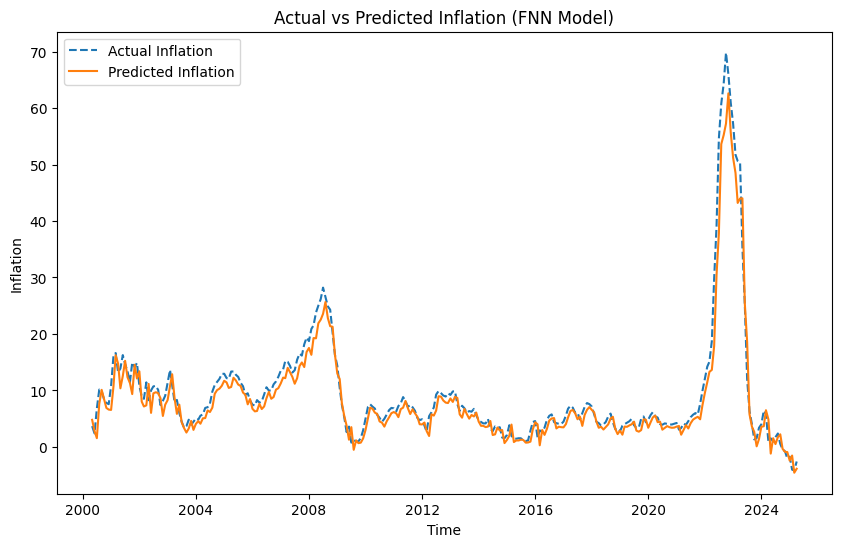

In [ ]:
# Initialize the MinMaxScaler
scaler_X_all = MinMaxScaler()
scaler_y_all = MinMaxScaler()

# Fit and transform the entire dataset for X (features)
X_all_scaled = scaler_X_all.fit_transform(x_all)

# Reshape y_all to be 2D
y_all_reshaped = y_all.values.reshape(-1, 1)

# Fit and transform the target variable
y_all_scaled = scaler_y_all.fit_transform(y_all_reshaped)


# Predict on the entire dataset
fnn_all_predictions_scaled = fnn_model.predict(X_all_scaled)

# Inverse transform predictions to get the original scale
fnn_all_predictions = scaler_y_all.inverse_transform(fnn_all_predictions_scaled)

# Create a DataFrame with the actual and predicted values
df_fnn_all_results = pd.DataFrame({
    'Actual Inflation': scaler_y_all.inverse_transform(y_all_scaled).ravel(),
    'Predicted Inflation (FNN)': fnn_all_predictions.ravel()
}, index=df2.index)  # Use the original index from df2

# Display the DataFrame
print(df_fnn_all_results)





# Plot actual vs predicted for the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(df_fnn_all_results['Actual Inflation'], label="Actual Inflation", linestyle='dashed')
plt.plot(df_fnn_all_results['Predicted Inflation (FNN)'], label="Predicted Inflation", linestyle='solid')
plt.title("Actual vs Predicted Inflation (FNN Model)")
plt.xlabel("Time")
plt.ylabel("Inflation")
plt.legend()
plt.show()







# ** LSTM **

Best Hyperparameters: {'n_past': 4, 'n_neurons': 77, 'n_layers': 1, 'activation': 'tanh', 'dropout_rate': 0.2530561078311571, 'batch_size': 8, 'optimizer': 'rmsprop', 'epochs': 100}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
RMSE: 3.1664
MSE: 10.0260
MAE: 1.9298
MAPE: 74.84%
R-squared: 0.9649

Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 20.4MB/s]


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412             Inflation
Date                 
2022-09-30  69.812630
2022-10-31  65.963240
2022-11-30  60.982084
2022-12-31  57.207498
2023-01-31  51.729686


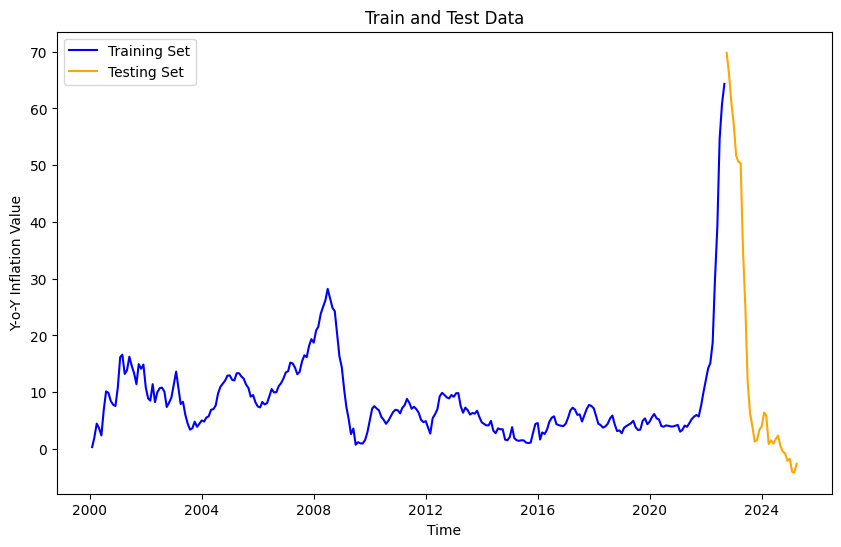

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
RMSE: 3.2015464816774397
MSE: 10.249899874341192
MAE: 2.195281053916359
MAPE: 74.01147561915383
R-squared: 0.9759128453096095


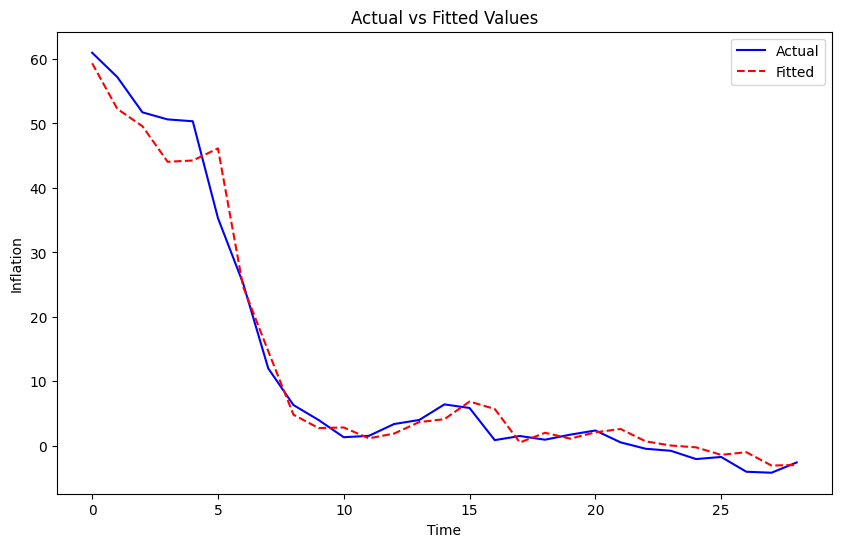

            Actual Inflation  Predicted Inflation (LSTM)
Date                                                    
2022-11-30         60.982084                   59.351883
2022-12-31         57.207498                   52.270992
2023-01-31         51.729686                   49.579079
2023-02-28         50.635930                   44.060722
2023-03-31         50.346955                   44.258545
Last sequence shape before forecasting: (4, 1)
Input shape to model.predict: (1, 4, 1)
Input dtype: float32
One-step-ahead forecast for 2025-04-01 00:00:00: -1.7627613544464111
Input shape to model.predict: (1, 4, 1)
Input dtype: float32
Input shape to model.predict: (1, 4, 1)
Input dtype: float32
Input shape to model.predict: (1, 4, 1)
Input dtype: float32
Input shape to model.predict: (1, 4, 1)
Input dtype: float32
Input shape to model.predict: (1, 4, 1)
Input dtype: float32
Input shape to model.predict: (1, 4, 1)
Input dtype: float32
Input shape to model.predict: (1, 4, 1)
Input dtype: float

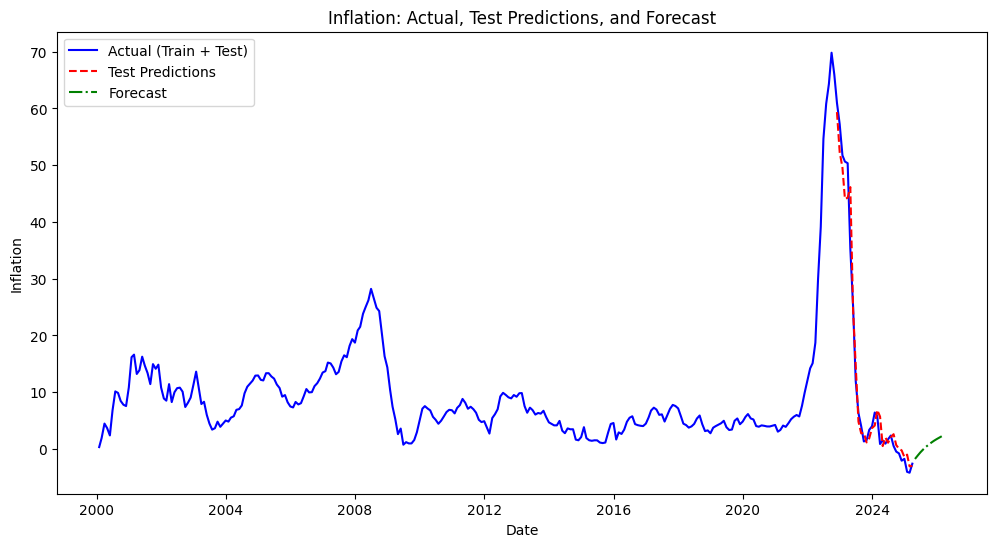

In [ ]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
# Set seeds
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Data manipulation
import pandas as pd

# Data download
import gdown
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"
output_file = "downloaded_file.xlsx"
gdown.download(download_url, output=output_file, quiet=False)

# Load dataset
data = pd.read_excel(output_file)
df = data.copy()

# Create a copy of the data
df = data.copy()

# Display column names
df.columns
df
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()

df.columns
!pip install optuna
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Assuming your dataset `df` is already loaded ---
# Train-test split
train_size = int(len(df) * 0.9)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


# Use the target variable as inflation data (y)
y_train = train_data['Inflation']  # Replace with your actual column name if different
y_test = test_data['Inflation']

# Normalize the target using StandardScaler
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Prepare data for LSTM (create sequences)
def create_sequences(y_scaled, n_past, n_future):
    X, y_data = [], []
    for i in range(n_past, len(y_scaled) - n_future + 1):
        X.append(y_scaled[i - n_past:i, 0])
        y_data.append(y_scaled[i + n_future - 1:i + n_future, 0])
    return np.array(X), np.array(y_data)
#Best Hyperparameters: {'n_past': 4, 'n_neurons': 77, 'n_layers': 1, 'activation': 'tanh', 'dropout_rate': 0.2530561078311571, 'batch_size': 8, 'optimizer': 'rmsprop', 'epochs': 100}

# Best hyperparameters found via Optuna
best_params = {
    'n_past': 4,
    'n_neurons': 77,
    'n_layers': 1,
    'activation': 'tanh',
    'dropout_rate': 0.2530561078311571,
    'batch_size': 8,
    'optimizer': 'rmsprop',
    'epochs': 100
}

n_past = best_params["n_past"]
n_neurons = best_params["n_neurons"]
n_layers = best_params["n_layers"]
activation = best_params["activation"]
dropout_rate = best_params["dropout_rate"]
batch_size = best_params["batch_size"]
optimizer = best_params["optimizer"]
epochs = best_params["epochs"]

# Create sequences for training and testing
X_train, y_train = create_sequences(y_train_scaled, n_past, 1)
X_test, y_test = create_sequences(y_test_scaled, n_past, 1)

# Build the LSTM model with the best parameters
model = Sequential()

# First LSTM layer
model.add(LSTM(n_neurons, return_sequences=(n_layers > 1), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))

# Additional LSTM layers (if n_layers > 1)
for _ in range(n_layers - 1):
    model.add(LSTM(n_neurons, return_sequences=False))
    model.add(Dropout(dropout_rate))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=optimizer, loss="mean_squared_error")

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

df
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Assuming your dataset `df` is already loaded ---
# Train-test split
train_size = int(len(df) * 0.9)
train_data = df.iloc[:train_size]
test_data = df[df.index >= '2022-07-30']

# Use the target variable as inflation data (y)
y_train = train_data['Inflation']  # Replace with your actual column name if different
y_test = test_data['Inflation']

# Normalize the target using StandardScaler
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Prepare data for LSTM (create sequences)
def create_sequences(y_scaled, n_past, n_future):
    X, y_data = [], []
    for i in range(n_past, len(y_scaled) - n_future + 1):
        X.append(y_scaled[i - n_past:i, 0])
        y_data.append(y_scaled[i + n_future - 1:i + n_future, 0])
    return np.array(X), np.array(y_data)

X_test, y_test = create_sequences(y_test_scaled, n_past, 1)



# Predict on test set
y_pred_scaled = model.predict(X_test)

# Inverse transform to get the actual predicted values
y_pred_lstm = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate performance metrics
mse_lstm = mean_squared_error(y_test_actual, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test_actual, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test_actual - y_pred_lstm) / y_test_actual)) * 100
r2_lstm = r2_score(y_test_actual, y_pred_lstm)

# Print the results
print(f"RMSE: {rmse_lstm}")
print(f"MSE: {mse_lstm}")
print(f"MAE: {mae_lstm}")
print(f"MAPE: {mape_lstm}")
print(f"R-squared: {r2_lstm}")

# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label="Actual", color='blue')
plt.plot(y_pred_lstm, label="Fitted", color='red', linestyle='--')
plt.title('Actual vs Fitted Values')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.legend()

plt.show()

# Create a DataFrame for actual and predicted test values
df_lstm_results = pd.DataFrame({
    'Date': df.index[-len(y_test):],  # Use the correct index slice from the original dataframe
    'Actual Inflation': y_test_actual.flatten(),
    'Predicted Inflation (LSTM)': y_pred_lstm.flatten()
})

# Set 'Date' as the index
df_lstm_results.set_index('Date', inplace=True)

# Display the DataFrame
print(df_lstm_results.head())

# Optional: Save to CSV
df_lstm_results.to_csv('lstm_test_results.csv')
df_lstm_results
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Updated Forecasting Functionality ---
# Function for one-step-ahead forecasting
def forecast_one_step(model, last_sequence, scaler):
    # Ensure last_sequence is a NumPy array with shape (n_past, 1)
    last_sequence = np.array(last_sequence, dtype=np.float32)
    if last_sequence.shape != (n_past, 1):
        last_sequence = last_sequence.reshape(n_past, 1)
    # Reshape to (1, n_past, 1) for model input
    last_sequence = last_sequence.reshape(1, n_past, 1)
    print(f"Input shape to model.predict: {last_sequence.shape}")  # Debug
    print(f"Input dtype: {last_sequence.dtype}")  # Debug
    # Convert to TensorFlow tensor explicitly
    last_sequence = tf.convert_to_tensor(last_sequence, dtype=tf.float32)
    # Predict using predict_on_batch to avoid rank issues
    try:
        pred_scaled = model.predict_on_batch(last_sequence)
    except Exception as e:
        print(f"Error in predict_on_batch: {e}")
        # Fallback to model.predict
        pred_scaled = model.predict(last_sequence, verbose=0)
    # Inverse transform
    pred = scaler.inverse_transform(pred_scaled)
    return pred[0, 0]

# Function for multi-step forecasting
def forecast_multi_step(model, last_sequence, n_steps, scaler, freq='M'):
    forecasts = []
    current_sequence = last_sequence.copy()
    last_date = df.index[-1]

    # Generate future dates
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_steps, freq=freq)

    for _ in range(n_steps):
        pred = forecast_one_step(model, current_sequence, scaler)
        forecasts.append(pred)
        # Scale the prediction and update the sequence
        scaled_pred = scaler.transform(np.array([[pred]]))
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = scaled_pred

    return pd.DataFrame({'Date': future_dates, 'Forecasted Inflation': forecasts})

# Get the last n_past values from the dataset
all_scaled_data = np.concatenate([y_train_scaled, y_test_scaled])
last_sequence = all_scaled_data[-n_past:]
print(f"Last sequence shape before forecasting: {last_sequence.shape}")  # Debug

# One-step-ahead forecast
one_step_forecast = forecast_one_step(model, last_sequence, scaler_y)
print(f"One-step-ahead forecast for {df.index[-1] + pd.Timedelta(days=1)}: {one_step_forecast}")

# Multi-step forecast (e.g., 6 steps ahead)
n_future_steps = 12
forecast_df = forecast_multi_step(model, last_sequence, n_future_steps, scaler_y, freq='M')  # Adjust 'freq' based on your data
forecast_df.set_index('Date', inplace=True)
print("\nMulti-step forecast:")
print(forecast_df)

# Save forecasts to CSV
forecast_df.to_csv('lstm_forecast_results.csv')

# Plot actual, test predictions, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Inflation'], label='Actual (Train + Test)', color='blue')
plt.plot(df_lstm_results.index, df_lstm_results['Predicted Inflation (LSTM)'], label='Test Predictions', color='red', linestyle='--')
plt.plot(forecast_df.index, forecast_df['Forecasted Inflation'], label='Forecast', color='green', linestyle='-.')
plt.title('Inflation: Actual, Test Predictions, and Forecast')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.show()

forecast_df_12=forecast_df.copy()

RMSE: 3.2015464816774397
MSE: 10.249899874341192
MAE: 2.195281053916359
MAPE: 74.01147561915383
R-squared: 0.9759128453096095

# ** CNN **

lag 2
Best trial: {'filters': 62, 'kernel_size': 1, 'lr': 0.005942373996699401, 'epochs': 45, 'batch_size': 16}

Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 14.9MB/s]


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)
Epoch 1/48
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0105
Epoch 2/48
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029
Epoch 3/48
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021
Epoch 4/48
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0017
Epoch 5/48
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015
Epoch 6/48
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step -

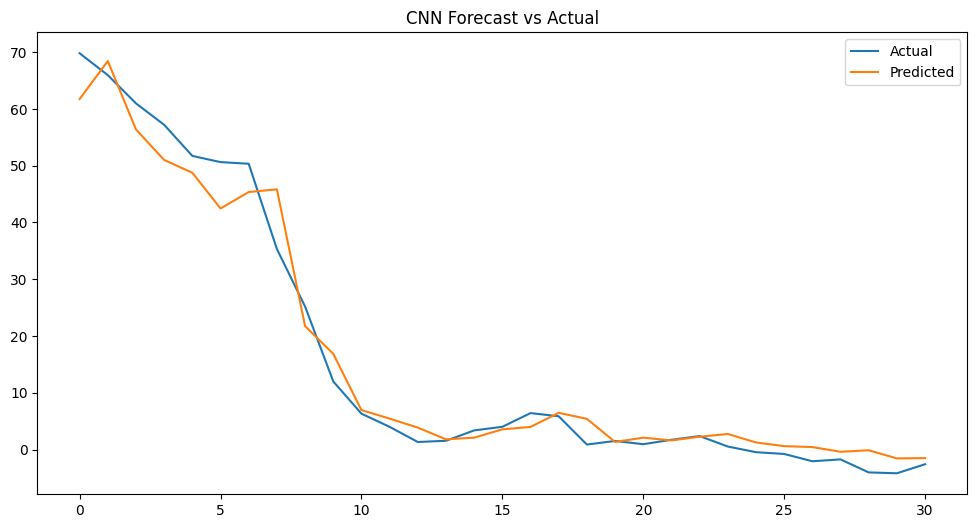

            Actual Inflation  Predicted Inflation (CNN)
Date                                                   
2022-09-30         69.812630                  61.750320
2022-10-31         65.963240                  68.438332
2022-11-30         60.982084                  56.393021
2022-12-31         57.207498                  51.012012
2023-01-31         51.729686                  48.765736
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/s

In [ ]:
# Set seeds
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd

# Data download
import gdown
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"
output_file = "downloaded_file.xlsx"
gdown.download(download_url, output=output_file, quiet=False)

# Load dataset
data = pd.read_excel(output_file)
df = data.copy()

# Display column names
df.columns
df
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)
df
! pip install optuna
!pip install optuna
!pip install scikit-learn
!pip install tensorflow


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename for ease if necessary
target_column ="Inflation" # e.g., "Inflation"

# Normalize the data
scaler = MinMaxScaler()
df[target_column] = scaler.fit_transform(df[[target_column]])

# Convert to supervised learning format
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 2  # Monthly data (1 year of past data to predict next month)  #################################################################

# Prepare input/output
X, y = create_sequences(df[target_column].values, window_size)

split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for CNN [samples, time steps, features]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

import optuna
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
#{'filters': 81, 'kernel_size': 2, 'lr': 0.00911213656673586, 'epochs': 48, 'batch_size': 16}
# Best parameters from Optuna
filters = 81
kernel_size = 2
lr = 0.00911213656673586
epochs = 48
batch_size = 16

# Build and compile the model
model = Sequential()
model.add(Conv1D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=lr), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse_cnn = mean_squared_error(y_test_inv, y_pred_inv)
rmse_cnn  = np.sqrt(mse_cnn)
mae_cnn  = mean_absolute_error(y_test_inv, y_pred_inv)
mape_cnn  = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2_cnn  = r2_score(y_test_inv, y_pred_inv)

# Print results
print(f" Test MSE  : {mse_cnn :.4f}")
print(f" Test RMSE : {rmse_cnn :.4f}")
print(f" Test MAE  : {mae_cnn :.4f}")
print(f" Test MAPE : {mape_cnn :.2f}%")
print(f" Test R²   : {r2_cnn :.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Forecast vs Actual')
plt.legend()
plt.show()



# Create a DataFrame for actual and predicted values with the test index
results_df_cnn = pd.DataFrame({
    'Date': df.index[-len(y_test):],  # Use the same index as the test set for actual values
    'Actual Inflation': y_test_inv.flatten(),
    'Predicted Inflation (CNN)': y_pred_inv.flatten()
})

# Set 'Date' as the index
results_df_cnn.set_index('Date', inplace=True)

# Display the results
print(results_df_cnn.head())

# Optionally, you can save this to a CSV file for future use
results_df_cnn.to_csv('test_results.csv')
results_df_cnn
y_test_inv
y_pred_inv
# Forecasting function for multiple horizons
def forecast_multiple_horizons(model, X_input, scaler, horizon):
    forecast = []
    current_input = X_input[-1]  # Start with the last data point of the test set

    # Forecast for the given horizon
    for _ in range(horizon):
        # Predict next value
        next_value = model.predict(current_input[np.newaxis, ...])

        # Inverse transform the predicted value to original scale
        next_value_inv = scaler.inverse_transform(next_value)
        forecast.append(next_value_inv[0][0])

        # Update input for next prediction (rolling window)
        current_input = np.append(current_input[1:], next_value, axis=0)

    return np.array(forecast)

# 1-Month Forecast
forecast_1month = forecast_multiple_horizons(model, X_test, scaler, horizon=1)

# 3-Month Forecast
forecast_3months = forecast_multiple_horizons(model, X_test, scaler, horizon=3)

# 12-Month Forecast
forecast_12months = forecast_multiple_horizons(model, X_test, scaler, horizon=12)

# Create the future index
future_index_1month = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=1, freq='M')
future_index_3months = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=3, freq='M')
future_index_12months = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')

# Create DataFrames to store the forecasts
df_forecast_1month = pd.DataFrame(forecast_1month, index=future_index_1month, columns=['Forecast'])
df_forecast_3months = pd.DataFrame(forecast_3months, index=future_index_3months, columns=['Forecast'])
df_forecast_12months = pd.DataFrame(forecast_12months, index=future_index_12months, columns=['Forecast'])

# Display the forecast DataFrames
print("1-Month Forecast:")
print(df_forecast_1month)

print("\n3-Month Forecast:")
print(df_forecast_3months)

print("\n12-Month Forecast:")
print(df_forecast_12months)

# Optionally, you can save the forecasts to CSV
df_forecast_1month.to_csv('forecast_1month.csv')
df_forecast_3months.to_csv('forecast_3months.csv')
df_forecast_12months.to_csv('forecast_12months.csv')

import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# 1. Plot Actual Inflation values
fig.add_trace(go.Scatter(
    x=df.index[-len(y_test):],  # Use the same index as the test set for actual values
    y=y_test_inv.flatten(),  # Flatten the test set predictions for actual inflation
    mode='lines+markers',
    name='Actual Inflation',
    line=dict(color='blue')
))

# 2. Plot Predicted Inflation values
fig.add_trace(go.Scatter(
    x=df.index[-len(y_test):],  # Use the same index as the test set for predicted values
    y=y_pred_inv.flatten(),  # Flatten the predicted values for inflation
    mode='lines+markers',
    name='Predicted Inflation (CNN)',
    line=dict(color='orange')
))

# 5. Plot 12-Month Forecasted values
fig.add_trace(go.Scatter(
    x=future_index_12months,  # Use future index for 12-month forecast
    y=forecast_12months,
    mode='lines+markers',
    name='12-Month Forecasted Inflation',
    line=dict(color='purple', dash='dash')
))

# Layout settings
fig.update_layout(
    title='Actual, Predicted, and Forecasted Inflation - CNN Model',
    xaxis_title='Date',
    yaxis_title='Inflation',
    legend=dict(x=0.01, y=0.99),
    hovermode='x unified',
    template='plotly_white'
)

# Show plot
fig.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
 Test MSE  : 14.7451
 Test RMSE : 3.8399
 Test MAE  : 2.8629
 Test MAPE : 81.56%
 Test R²   : 0.9747

# Predictions

In [ ]:
### FNN
df_fnn_test_results

,Actual Inflation,Predicted Inflation (FNN)
Date,,
2022-10-31,65.963240,66.754059
2022-11-30,60.982084,59.126068
2022-12-31,57.207498,54.300362
2023-01-31,51.729686,51.568138
2023-02-28,50.635930,45.965584
2023-03-31,50.346955,46.980595
2023-04-30,35.327234,47.064972
2023-05-31,25.195313,26.914110
2023-06-30,11.997670,19.899181


In [ ]:
### SVR
df_predictions_svr
df_predictions_svr=df_predictions_svr.drop(columns=["Actual"])
df_predictions_svr.columns


Index(['Predicted (SVR Final)'], dtype='object')

In [ ]:
### LSTM
df_lstm_results.columns
df_lstm_results=df_lstm_results.drop(columns=["Actual Inflation"])
df_lstm_results.columns
df_lstm_results

,Predicted Inflation (LSTM)
Date,
2022-11-30,59.351883
2022-12-31,52.270992
2023-01-31,49.579079
2023-02-28,44.060722
2023-03-31,44.258545
2023-04-30,46.132633
2023-05-31,24.680729
2023-06-30,14.665593
2023-07-31,4.820120


In [ ]:

### CNN
### LSTM
results_df_cnn.columns
results_df_cnn=results_df_cnn.drop(columns=["Actual Inflation"])
results_df_cnn.columns
results_df_cnn
results_df_cnn

,Predicted Inflation (CNN)
Date,
2022-09-30,61.750320
2022-10-31,68.438332
2022-11-30,56.393021
2022-12-31,51.012012
2023-01-31,48.765736
2023-02-28,42.469997
2023-03-31,45.364857
2023-04-30,45.837940
2023-05-31,21.737574


In [ ]:



### Merged

In [ ]:
df_predictions_svr.columns

Index(['Predicted (SVR Final)'], dtype='object')

In [ ]:
import pandas as pd

# List of DataFrames with their names
dataframes = {
    'FNN': df_fnn_test_results,
    'SVR': df_predictions_svr,
    'LSTM': df_lstm_results,
    'CNN': results_df_cnn
}

# Print dimensions of each DataFrame
for name, df in dataframes.items():
    print(f"{name} DataFrame dimensions: {df.shape}")

FNN DataFrame dimensions: (30, 2)
SVR DataFrame dimensions: (31, 1)
LSTM DataFrame dimensions: (29, 1)
CNN DataFrame dimensions: (31, 1)


In [ ]:
### Merged
df_predictions_svr.columns
print(df_lstm_results.head())#2022-11-30                   59.351883
print(df_predictions_svr.head())#2022-10-31                   59.351883
print(df_fnn_test_results.head())#2022-10-31                   59.351883
print(results_df_cnn.head())#9-30

# Find common datetime index
common_index = df_lstm_results.index \
    .intersection(df_predictions_svr.index) \
    .intersection(df_fnn_test_results.index) \
    .intersection(results_df_cnn.index)

# Reindex all DataFrames to this common index
df_lstm_results = df_lstm_results.loc[common_index]
df_predictions_svr = df_predictions_svr.loc[common_index]
df_fnn_test_results = df_fnn_test_results.loc[common_index]
results_df_cnn = results_df_cnn.loc[common_index]


            Predicted Inflation (LSTM)
Date                                  
2022-11-30                   59.351883
2022-12-31                   52.270992
2023-01-31                   49.579079
2023-02-28                   44.060722
2023-03-31                   44.258545
            Predicted (SVR Final)
Date                             
2022-09-30              65.319586
2022-10-31              71.679135
2022-11-30              63.408440
2022-12-31              57.953396
2023-01-31              54.808332
            Actual Inflation  Predicted Inflation (FNN)
Date                                                   
2022-10-31         65.963240                  66.754059
2022-11-30         60.982084                  59.126068
2022-12-31         57.207498                  54.300362
2023-01-31         51.729686                  51.568138
2023-02-28         50.635930                  45.965584
            Predicted Inflation (CNN)
Date                                 
2022-09-30           

In [ ]:
import pandas as pd

# List of DataFrames with their names
dataframes = {
    'FNN': df_fnn_test_results,
    'SVR': df_predictions_svr,
    'LSTM': df_lstm_results,
    'CNN': results_df_cnn
}

# Print dimensions of each DataFrame
for name, df in dataframes.items():
    print(f"{name} DataFrame dimensions: {df.shape}")

FNN DataFrame dimensions: (29, 2)
SVR DataFrame dimensions: (29, 1)
LSTM DataFrame dimensions: (29, 1)
CNN DataFrame dimensions: (29, 1)


In [ ]:
import pandas as pd



# Verify that all DataFrames have the same index
for name, df in dataframes.items():
    assert df.index.equals(list(dataframes.values())[0].index), f"{name} DataFrame has a different index"

# Merge DataFrames using concat on the DateTime index
merged_df_pred = pd.concat(dataframes.values(), axis=1, keys=dataframes.keys())

# Flatten the MultiIndex columns (optional, for clarity)
merged_df_pred.columns = [f"{model}_{col}" for model, col in merged_df_pred.columns]

# Reset index to make DateTime a column (optional)
#merged_df = merged_df.reset_index()

# Display the merged DataFrame (for verification)
print(merged_df_pred.head())
merged_df_pred

            FNN_Actual Inflation  FNN_Predicted Inflation (FNN)  \
Date                                                              
2022-11-30             60.982084                      59.126068   
2022-12-31             57.207498                      54.300362   
2023-01-31             51.729686                      51.568138   
2023-02-28             50.635930                      45.965584   
2023-03-31             50.346955                      46.980595   

            SVR_Predicted (SVR Final)  LSTM_Predicted Inflation (LSTM)  \
Date                                                                     
2022-11-30                  63.408440                        59.351883   
2022-12-31                  57.953396                        52.270992   
2023-01-31                  54.808332                        49.579079   
2023-02-28                  48.589734                        44.060722   
2023-03-31                  49.610633                        44.258545   

           

,FNN_Actual Inflation,FNN_Predicted Inflation (FNN),SVR_Predicted (SVR Final),LSTM_Predicted Inflation (LSTM),CNN_Predicted Inflation (CNN)
Date,,,,,
2022-11-30,60.982084,59.126068,63.408440,59.351883,56.393021
2022-12-31,57.207498,54.300362,57.953396,52.270992,51.012012
2023-01-31,51.729686,51.568138,54.808332,49.579079,48.765736
2023-02-28,50.635930,45.965584,48.589734,44.060722,42.469997
2023-03-31,50.346955,46.980595,49.610633,44.258545,45.364857
2023-04-30,35.327234,47.064972,49.711051,46.132633,45.837940
2023-05-31,25.195313,26.914110,27.841742,24.680729,21.737574
2023-06-30,11.997670,19.899181,20.189407,14.665593,16.864170
2023-07-31,6.316378,6.204835,5.704062,4.820120,6.949246


In [ ]:
merged_df_pred=merged_df_pred.copy()
merged_df_pred.columns

Index(['FNN_Actual Inflation', 'FNN_Predicted Inflation (FNN)',
       'SVR_Predicted (SVR Final)', 'LSTM_Predicted Inflation (LSTM)',
       'CNN_Predicted Inflation (CNN)'],
      dtype='object')

In [ ]:

merged_df_pred

,FNN_Actual Inflation,FNN_Predicted Inflation (FNN),SVR_Predicted (SVR Final),LSTM_Predicted Inflation (LSTM),CNN_Predicted Inflation (CNN)
Date,,,,,
2022-11-30,60.982084,59.126068,63.408440,59.351883,56.393021
2022-12-31,57.207498,54.300362,57.953396,52.270992,51.012012
2023-01-31,51.729686,51.568138,54.808332,49.579079,48.765736
2023-02-28,50.635930,45.965584,48.589734,44.060722,42.469997
2023-03-31,50.346955,46.980595,49.610633,44.258545,45.364857
2023-04-30,35.327234,47.064972,49.711051,46.132633,45.837940
2023-05-31,25.195313,26.914110,27.841742,24.680729,21.737574
2023-06-30,11.997670,19.899181,20.189407,14.665593,16.864170
2023-07-31,6.316378,6.204835,5.704062,4.820120,6.949246


In [ ]:

import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py

# Assuming merged_df_pred is your DataFrame with the specified columns
# Print DataFrame info for verification
print("Merged DataFrame columns:", merged_df_pred.columns)
print("Merged DataFrame shape:", merged_df_pred.shape)

# Create traces for each series in merged_df_pred
data = []

# Define colors for each series
colors = {
    'FNN_Actual Inflation': 'black',
    'SVR_Predicted (SVR Final)': 'blue',
    'FNN_Predicted Inflation (FNN)': 'green',
    'LSTM_Predicted Inflation (LSTM)': 'red',
    'CNN_Predicted Inflation (CNN)': 'purple'
}

# Add trace for each column
for col in merged_df_pred.columns:
    is_actual = 'Actual' in col
    trace = go.Scatter(
        x=merged_df_pred.index,
        y=merged_df_pred[col],
        mode='lines+markers',
        name=col,
        line=dict(
            color=colors.get(col, 'gray'),
            width=2,
            dash='solid' if is_actual else 'dash'  # Solid for actual, dashed for predictions
        ),
        marker=dict(size=6),
        hovertemplate=f'{col}<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
    )
    data.append(trace)

# Layout settings

layout = go.Layout(
    title='Actual vs Predicted Inflation (All Models)',
    xaxis=dict(
        title='Date',
        tickformat='%Y-%m-%d',
        tickangle=45
    ),
    yaxis=dict(title='Inflation'),
    hovermode='closest',  # Shows tooltip for the closest point
    showlegend=True,
    template='plotly_white'  # Clean white background
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show interactive plot
py.iplot(fig)


Merged DataFrame columns: Index(['FNN_Actual Inflation', 'FNN_Predicted Inflation (FNN)',
       'SVR_Predicted (SVR Final)', 'LSTM_Predicted Inflation (LSTM)',
       'CNN_Predicted Inflation (CNN)'],
      dtype='object')
Merged DataFrame shape: (29, 5)


# Forecasts

In [ ]:
### SVR
future_df_svr_12
### FNN
future_preds_fnn
### LSTM
forecast_df_12
### CNN
df_forecast_12months

,Forecast
2025-04-30,-1.517106
2025-05-31,0.125619
2025-06-30,1.171120
2025-07-31,1.867701
2025-08-31,2.360237
2025-09-30,2.724696
2025-10-31,2.995451
2025-11-30,3.197979
2025-12-31,3.349926
2026-01-31,3.463950


In [ ]:
import pandas as pd

# Dictionary of DataFrames with their names
dataframes = {
    'SVR': future_df_svr_12,
    'FNN': future_preds_fnn,
    'LSTM': forecast_df_12,
    'CNN': df_forecast_12months
}

# Print dimensions of each DataFrame
for name, df in dataframes.items():
    print(f"{name} DataFrame dimensions: {df.shape}")

SVR DataFrame dimensions: (12, 1)
FNN DataFrame dimensions: (12, 1)
LSTM DataFrame dimensions: (12, 1)
CNN DataFrame dimensions: (12, 1)


In [ ]:
import pandas as pd



# Verify that all DataFrames have the same index
for name, df in dataframes.items():
    assert df.index.equals(list(dataframes.values())[0].index), f"{name} DataFrame has a different index"

# Merge DataFrames using concat on the DateTime index
merged_df_forecast = pd.concat(dataframes.values(), axis=1, keys=dataframes.keys())

# Flatten the MultiIndex columns (optional, for clarity)
merged_df_forecast.columns = [f"{model}_{col}" for model, col in merged_df_forecast.columns]

# Reset index to make DateTime a column (optional)
#merged_df = merged_df.reset_index()

# Display the merged DataFrame (for verification)
print(merged_df_forecast.head())
merged_df_forecast

            SVR_Predicted Inflation (SVR)  FNN_Predicted Inflation (FNN)  \
2025-04-30                      -1.602158                      -1.445653   
2025-05-31                      -0.914384                      -0.580655   
2025-06-30                      -0.381066                       0.126335   
2025-07-31                       0.070978                       0.733825   
2025-08-31                       0.477913                       1.269877   

            LSTM_Forecasted Inflation  CNN_Forecast  
2025-04-30                  -1.762761     -1.517106  
2025-05-31                  -1.156472      0.125619  
2025-06-30                  -0.598503      1.171120  
2025-07-31                  -0.095763      1.867701  
2025-08-31                   0.350611      2.360237  


,SVR_Predicted Inflation (SVR),FNN_Predicted Inflation (FNN),LSTM_Forecasted Inflation,CNN_Forecast
2025-04-30,-1.602158,-1.445653,-1.762761,-1.517106
2025-05-31,-0.914384,-0.580655,-1.156472,0.125619
2025-06-30,-0.381066,0.126335,-0.598503,1.171120
2025-07-31,0.070978,0.733825,-0.095763,1.867701
2025-08-31,0.477913,1.269877,0.350611,2.360237
2025-09-30,0.857674,1.749200,0.750148,2.724696
2025-10-31,1.219226,2.180556,1.110499,2.995451
2025-11-30,1.567108,2.569938,1.437174,3.197979
2025-12-31,1.903683,2.921940,1.734651,3.349926
2026-01-31,2.230238,3.240366,2.006662,3.463950


In [ ]:
merged_df_forecast.columns

Index(['SVR_Predicted Inflation (SVR)', 'FNN_Predicted Inflation (FNN)',
       'LSTM_Forecasted Inflation', 'CNN_Forecast'],
      dtype='object')

# Evaluations

## SVR

In [ ]:
print(f"Final SVR Model (Lag={optimal_lag_svr})\nRMSE: {rmse_svr:.4f}, MSE: {mse_svr:.4f}, MAE: {mae_svr:.4f}, MAPE: {mape_svr:.2f}%, R²: {r2_svr:.4f}")


Final SVR Model (Lag=2)
RMSE: 3.6809, MSE: 13.5493, MAE: 2.3653, MAPE: 69.73%, R²: 0.9767


## FNN

In [ ]:

# Print results
print("[FNN Model] Test Results:")
print(f"MSE: {fnn_mse_fnn :.4f}")
print(f"RMSE: {fnn_rmse_fnn :.4f}")
print(f"MAE: {fnn_mae_fnn :.4f}")
print(f"MAPE: {fnn_mape_fnn :.2f}%")
print(f"R²: {fnn_r2_fnn :.4f}")

[FNN Model] Test Results:
MSE: 10.3534
RMSE: 3.2177
MAE: 2.0722
MAPE: 71.20%
R²: 0.9794


## CNN

In [ ]:
# Print results
print(f" Test MSE  : {mse_cnn :.4f}")
print(f" Test RMSE : {rmse_cnn :.4f}")
print(f" Test MAE  : {mae_cnn :.4f}")
print(f" Test MAPE : {mape_cnn :.2f}%")
print(f" Test R²   : {r2_cnn :.4f}")

 Test MSE  : 14.7451
 Test RMSE : 3.8399
 Test MAE  : 2.8629
 Test MAPE : 81.56%
 Test R²   : 0.9747


## LSTM

In [ ]:
# Print the results
print(f"RMSE: {rmse_lstm}")
print(f"MSE: {mse_lstm}")
print(f"MAE: {mae_lstm}")
print(f"MAPE: {mape_lstm}")
print(f"R-squared: {r2_lstm}")

RMSE: 3.2015464816774397
MSE: 10.249899874341192
MAE: 2.195281053916359
MAPE: 74.01147561915383
R-squared: 0.9759128453096095


# Summary

In [ ]:
merged_df_forecast

,SVR_Predicted Inflation (SVR),FNN_Predicted Inflation (FNN),LSTM_Forecasted Inflation,CNN_Forecast
2025-04-30,-1.602158,-1.445653,-1.762761,-1.517106
2025-05-31,-0.914384,-0.580655,-1.156472,0.125619
2025-06-30,-0.381066,0.126335,-0.598503,1.171120
2025-07-31,0.070978,0.733825,-0.095763,1.867701
2025-08-31,0.477913,1.269877,0.350611,2.360237
2025-09-30,0.857674,1.749200,0.750148,2.724696
2025-10-31,1.219226,2.180556,1.110499,2.995451
2025-11-30,1.567108,2.569938,1.437174,3.197979
2025-12-31,1.903683,2.921940,1.734651,3.349926
2026-01-31,2.230238,3.240366,2.006662,3.463950


In [ ]:
merged_df_pred.columns


Index(['FNN_Actual Inflation', 'FNN_Predicted Inflation (FNN)',
       'SVR_Predicted (SVR Final)', 'LSTM_Predicted Inflation (LSTM)',
       'CNN_Predicted Inflation (CNN)'],
      dtype='object')

In [ ]:
y_actual=merged_df_pred["FNN_Actual Inflation"]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming merged_df_pred is your DataFrame with the specified columns
# Assign actual values
y_actual = merged_df_pred["FNN_Actual Inflation"]

# Define prediction columns
prediction_columns = [
    'SVR_Predicted (SVR Final)',
    'FNN_Predicted Inflation (FNN)',
    'LSTM_Predicted Inflation (LSTM)',
    'CNN_Predicted Inflation (CNN)'
]

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Initialize a dictionary to store results
results = {
    'Method': [],
    'RMSE': [],
    'MSE': [],
    'MAE': [],
    'MAPE': [],
    'R-squared': []
}

# Calculate metrics for each prediction column
for col in prediction_columns:
    y_pred = merged_df_pred[col]

    # Drop NaN values to ensure consistent lengths
    mask = ~y_actual.isna() & ~y_pred.isna()
    y_actual_clean = y_actual[mask]
    y_pred_clean = y_pred[mask]

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_actual_clean, y_pred_clean))
    mse = mean_squared_error(y_actual_clean, y_pred_clean)
    mae = mean_absolute_error(y_actual_clean, y_pred_clean)
    mape = mean_absolute_percentage_error(y_actual_clean, y_pred_clean)
    r2 = r2_score(y_actual_clean, y_pred_clean)

    # Store results
    method_name = col.split('_')[0]  # Extract method name (e.g., SVR, FNN)
    results['Method'].append(method_name)
    results['RMSE'].append(rmse)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['MAPE'].append(mape)
    results['R-squared'].append(r2)

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Print the results
print("Error Metrics for Each Prediction Method:")
print(results_df)

# Optionally, save results to a CSV file
results_df.to_csv('error_metrics.csv', index=False)

Error Metrics for Each Prediction Method:
  Method      RMSE        MSE       MAE       MAPE  R-squared
0    SVR  3.558236  12.661041  2.176397  74.017762   0.970247
1    FNN  3.269381  10.688851  2.116375  73.613381   0.974881
2   LSTM  3.201546  10.249900  2.195281  74.011476   0.975913
3    CNN  3.648194  13.309319  2.696930  86.658896   0.968723


## Ensemble

In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objs as go
import plotly.offline as py
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Assuming merged_df_pred is your DataFrame with the specified columns
# Print DataFrame info for verification
print("Merged DataFrame columns:", merged_df_pred.columns)
print("Merged DataFrame shape:", merged_df_pred.shape)

# Define prediction columns
prediction_columns = [
    'SVR_Predicted (SVR Final)',
    'FNN_Predicted Inflation (FNN)',
    'LSTM_Predicted Inflation (LSTM)',
    'CNN_Predicted Inflation (CNN)'
]

# Calculate the ensemble prediction by averaging
ensemble_pred = merged_df_pred[prediction_columns].mean(axis=1)

# Add ensemble prediction to the DataFrame
merged_df_pred['Ensemble_Predicted'] = ensemble_pred

# Evaluate ensemble performance
y_actual = merged_df_pred['FNN_Actual Inflation']

# Drop NaN values for consistent metric calculations
mask = ~y_actual.isna() & ~ensemble_pred.isna()
y_actual_clean = y_actual[mask]
ensemble_pred_clean = ensemble_pred[mask]

# Calculate error metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

rmse = np.sqrt(mean_squared_error(y_actual_clean, ensemble_pred_clean))
mse = mean_squared_error(y_actual_clean, ensemble_pred_clean)
mae = mean_absolute_error(y_actual_clean, ensemble_pred_clean)
mape = mean_absolute_percentage_error(y_actual_clean, ensemble_pred_clean)
r2 = r2_score(y_actual_clean, ensemble_pred_clean)

# Print ensemble metrics
print("\nEnsemble (Averaging) Performance Metrics:")
print(f"RMSE: {rmse:.6f}")
print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"MAPE: {mape:.6f}%")
print(f"R-squared: {r2:.6f}")

# Create interactive Plotly plot
data = []

# Define colors for each series
colors = {
    'FNN_Actual Inflation': 'black',
    'SVR_Predicted (SVR Final)': 'blue',
    'FNN_Predicted Inflation (FNN)': 'green',
    'LSTM_Predicted Inflation (LSTM)': 'red',
    'CNN_Predicted Inflation (CNN)': 'purple',
    'Ensemble_Predicted': 'orange'
}

# Add trace for each column (including ensemble)
for col in merged_df_pred.columns:
    is_actual = 'Actual' in col
    is_ensemble = 'Ensemble' in col
    trace = go.Scatter(
        x=merged_df_pred.index,
        y=merged_df_pred[col],
        mode='lines+markers',
        name=col,
        line=dict(
            color=colors.get(col, 'gray'),
            width=2,
            dash='solid' if is_actual else ('dot' if is_ensemble else 'dash')
        ),
        marker=dict(size=6),
        hovertemplate=f'{col}<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
    )
    data.append(trace)

# Layout settings
layout = go.Layout(
    title='Actual vs Predicted Inflation (All Models + Ensemble)',
    xaxis=dict(
        title='Date',
        tickformat='%Y-%m-%d',
        tickangle=45
    ),
    yaxis=dict(title='Inflation'),
    hovermode='closest',
    showlegend=True,
    template='plotly_white'
)

# Create and show figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



Merged DataFrame columns: Index(['FNN_Actual Inflation', 'FNN_Predicted Inflation (FNN)',
       'SVR_Predicted (SVR Final)', 'LSTM_Predicted Inflation (LSTM)',
       'CNN_Predicted Inflation (CNN)'],
      dtype='object')
Merged DataFrame shape: (29, 5)

Ensemble (Averaging) Performance Metrics:
RMSE: 3.168701
MSE: 10.040669
MAE: 2.010650
MAPE: 72.924237%
R-squared: 0.976405


# ENsemble 2 MSE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objs as go
import plotly.offline as py
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Assuming merged_df_pred is your DataFrame with the specified columns
print("Merged DataFrame columns:", merged_df_pred.columns)
print("Merged DataFrame shape:", merged_df_pred.shape)

# Define prediction columns and actual values
prediction_columns = [
    'SVR_Predicted (SVR Final)',
    'FNN_Predicted Inflation (FNN)',
    'LSTM_Predicted Inflation (LSTM)',
    'CNN_Predicted Inflation (CNN)'
]
y_actual = merged_df_pred['FNN_Actual Inflation']

# Clean data for evaluation
mask = ~y_actual.isna()
for col in prediction_columns:
    mask &= ~merged_df_pred[col].isna()
y_actual_clean = y_actual[mask]

# ======================================================================
# 2. Calculate Weighted Average Ensemble (Inverse MSE)
# ======================================================================
def calculate_model_errors(y_true, y_pred_dict):
    """Calculate MSE for each model's predictions"""
    errors = {}
    for model_name, y_pred in y_pred_dict.items():
        mask = ~y_true.isna() & ~y_pred.isna()
        errors[model_name] = mean_squared_error(y_true[mask], y_pred[mask])
    return errors

# Get predictions from all models
y_pred_dict = {
    'SVR': merged_df_pred['SVR_Predicted (SVR Final)'],
    'FNN': merged_df_pred['FNN_Predicted Inflation (FNN)'],
    'LSTM': merged_df_pred['LSTM_Predicted Inflation (LSTM)'],
    'CNN': merged_df_pred['CNN_Predicted Inflation (CNN)']
}

# Calculate MSE for each model
model_errors = calculate_model_errors(y_actual, y_pred_dict)

# Print detailed weight calculation
print("\nIndividual Model MSE Values:")
for model, error in model_errors.items():
    print(f"{model}: {error:.6f}")

# Calculate weights as inverse MSE (IMSE)
imse = {model: 1/error for model, error in model_errors.items()}
total_imse = sum(imse.values())
weights = {model: imse/total_imse for model, imse in imse.items()}

print("\nWeight Calculation Details:")
print("Formula: weight = (1/MSE) / sum(1/MSE for all models)")
for model, weight in weights.items():
    print(f"{model}:")
    print(f"  MSE = {model_errors[model]:.6f}")
    print(f"  1/MSE = {1/model_errors[model]:.6f}")
    print(f"  Weight = {weight:.6f} ({(weight*100):.2f}%)")
    print("-"*40)

print("\nWeight Sum Verification:")
print(f"Sum of all weights: {sum(weights.values()):.6f} (should be 1.0)")

# Calculate weighted ensemble prediction
weighted_ensemble_pred = (
    weights['SVR'] * merged_df_pred['SVR_Predicted (SVR Final)'] +
    weights['FNN'] * merged_df_pred['FNN_Predicted Inflation (FNN)'] +
    weights['LSTM'] * merged_df_pred['LSTM_Predicted Inflation (LSTM)'] +
    weights['CNN'] * merged_df_pred['CNN_Predicted Inflation (CNN)']
)

# Add to DataFrame
merged_df_pred['Weighted_Ensemble_Predicted_MSE'] = weighted_ensemble_pred

# Evaluate weighted ensemble
w_ensemble_pred_clean = weighted_ensemble_pred[mask]

print("\nWeighted Ensemble (Inverse MSE) Performance Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual_clean, w_ensemble_pred_clean)):.6f}")
print(f"MSE: {mean_squared_error(y_actual_clean, w_ensemble_pred_clean):.6f}")
print(f"MAE: {mean_absolute_error(y_actual_clean, w_ensemble_pred_clean):.6f}")
print(f"MAPE: {mean_absolute_percentage_error(y_actual_clean, w_ensemble_pred_clean):.6f}%")
print(f"R-squared: {r2_score(y_actual_clean, w_ensemble_pred_clean):.6f}")

# ======================================================================
# 3. Visualization
# ======================================================================
# Define colors for each series
colors = {
    'FNN_Actual Inflation': 'black',
    'SVR_Predicted (SVR Final)': 'blue',
    'FNN_Predicted Inflation (FNN)': 'green',
    'LSTM_Predicted Inflation (LSTM)': 'red',
    'CNN_Predicted Inflation (CNN)': 'purple',
    'Weighted_Ensemble_Predicted_MSE': 'darkorange'
}

# Create traces for all series
data = []
for col in merged_df_pred.columns:
    if col in colors:  # Only plot columns we've defined colors for
        is_actual = 'Actual' in col
        is_ensemble = 'Ensemble' in col
        trace = go.Scatter(
            x=merged_df_pred.index,
            y=merged_df_pred[col],
            mode='lines+markers',
            name=col,
            line=dict(
                color=colors[col],
                width=3 if is_ensemble else 2,
                dash='solid' if is_actual else ('dot' if is_ensemble else 'dash')
            ),
            marker=dict(size=6 if not is_ensemble else 8),
            hovertemplate=f'{col}<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
        )
        data.append(trace)

# Layout settings
layout = go.Layout(
    title='Actual vs Predicted Inflation (All Models + MSE Weighted Ensemble)',
    xaxis=dict(title='Date', tickformat='%Y-%m-%d', tickangle=45),
    yaxis=dict(title='Inflation'),
    hovermode='closest',
    showlegend=True,
    template='plotly_white'
)

# Create and show figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Merged DataFrame columns: Index(['FNN_Actual Inflation', 'FNN_Predicted Inflation (FNN)',
       'SVR_Predicted (SVR Final)', 'LSTM_Predicted Inflation (LSTM)',
       'CNN_Predicted Inflation (CNN)', 'Ensemble_Predicted'],
      dtype='object')
Merged DataFrame shape: (29, 6)

Individual Model MSE Values:
SVR: 12.661041
FNN: 10.688851
LSTM: 10.249900
CNN: 13.309319

Weight Calculation Details:
Formula: weight = (1/MSE) / sum(1/MSE for all models)
SVR:
  MSE = 12.661041
  1/MSE = 0.078982
  Weight = 0.228779 (22.88%)
----------------------------------------
FNN:
  MSE = 10.688851
  1/MSE = 0.093555
  Weight = 0.270990 (27.10%)
----------------------------------------
LSTM:
  MSE = 10.249900
  1/MSE = 0.097562
  Weight = 0.282596 (28.26%)
----------------------------------------
CNN:
  MSE = 13.309319
  1/MSE = 0.075135
  Weight = 0.217635 (21.76%)
----------------------------------------

Weight Sum Verification:
Sum of all weights: 1.000000 (should be 1.0)

Weighted Ensemble (Inverse 

# EMsemble 3 = RMSE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objs as go
import plotly.offline as py
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Assuming merged_df_pred is your DataFrame with the specified columns
print("Merged DataFrame columns:", merged_df_pred.columns)
print("Merged DataFrame shape:", merged_df_pred.shape)

# Define prediction columns and actual values
prediction_columns = [
    'SVR_Predicted (SVR Final)',
    'FNN_Predicted Inflation (FNN)',
    'LSTM_Predicted Inflation (LSTM)',
    'CNN_Predicted Inflation (CNN)'
]
y_actual = merged_df_pred['FNN_Actual Inflation']

# Clean data for evaluation
mask = ~y_actual.isna()
for col in prediction_columns:
    mask &= ~merged_df_pred[col].isna()
y_actual_clean = y_actual[mask]

# ======================================================================
# 2. Calculate Weighted Average Ensemble (Inverse RMSE)
# ======================================================================
def calculate_model_errors(y_true, y_pred_dict):
    """Calculate RMSE for each model's predictions"""
    errors = {}
    for model_name, y_pred in y_pred_dict.items():
        mask = ~y_true.isna() & ~y_pred.isna()
        errors[model_name] = np.sqrt(mean_squared_error(y_true[mask], y_pred[mask]))
    return errors

# Get predictions from all models
y_pred_dict = {
    'SVR': merged_df_pred['SVR_Predicted (SVR Final)'],
    'FNN': merged_df_pred['FNN_Predicted Inflation (FNN)'],
    'LSTM': merged_df_pred['LSTM_Predicted Inflation (LSTM)'],
    'CNN': merged_df_pred['CNN_Predicted Inflation (CNN)']
}

# Calculate RMSE for each model
model_errors = calculate_model_errors(y_actual, y_pred_dict)

# Print detailed weight calculation
print("\nIndividual Model RMSE Values:")
for model, error in model_errors.items():
    print(f"{model}: {error:.6f}")

# Calculate weights as inverse RMSE (IRMSE)
irmse = {model: 1/error for model, error in model_errors.items()}
total_irmse = sum(irmse.values())
weights = {model: irmse/total_irmse for model, irmse in irmse.items()}

print("\nWeight Calculation Details:")
print("Formula: weight = (1/RMSE) / sum(1/RMSE for all models)")
for model, weight in weights.items():
    print(f"{model}:")
    print(f"  RMSE = {model_errors[model]:.6f}")
    print(f"  1/RMSE = {1/model_errors[model]:.6f}")
    print(f"  Weight = {weight:.6f} ({(weight*100):.2f}%)")
    print("-"*40)

print("\nWeight Sum Verification:")
print(f"Sum of all weights: {sum(weights.values()):.6f} (should be 1.0)")

# Calculate weighted ensemble prediction
weighted_ensemble_pred = (
    weights['SVR'] * merged_df_pred['SVR_Predicted (SVR Final)'] +
    weights['FNN'] * merged_df_pred['FNN_Predicted Inflation (FNN)'] +
    weights['LSTM'] * merged_df_pred['LSTM_Predicted Inflation (LSTM)'] +
    weights['CNN'] * merged_df_pred['CNN_Predicted Inflation (CNN)']
)

# Add to DataFrame
merged_df_pred['Weighted_Ensemble_Predicted_RMSE'] = weighted_ensemble_pred

# Evaluate weighted ensemble
w_ensemble_pred_clean = weighted_ensemble_pred[mask]

print("\nWeighted Ensemble (Inverse RMSE) Performance Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual_clean, w_ensemble_pred_clean)):.6f}")
print(f"MSE: {mean_squared_error(y_actual_clean, w_ensemble_pred_clean):.6f}")
print(f"MAE: {mean_absolute_error(y_actual_clean, w_ensemble_pred_clean):.6f}")
print(f"MAPE: {mean_absolute_percentage_error(y_actual_clean, w_ensemble_pred_clean):.6f}%")
print(f"R-squared: {r2_score(y_actual_clean, w_ensemble_pred_clean):.6f}")

# ======================================================================
# 3. Visualization
# ======================================================================
# Define colors for each series
colors = {
    'FNN_Actual Inflation': 'black',
    'SVR_Predicted (SVR Final)': 'blue',
    'FNN_Predicted Inflation (FNN)': 'green',
    'LSTM_Predicted Inflation (LSTM)': 'red',
    'CNN_Predicted Inflation (CNN)': 'purple',
    'Weighted_Ensemble_Predicted_RMSE': 'darkorange'
}

# Create traces for all series
data = []
for col in merged_df_pred.columns:
    if col in colors:  # Only plot columns we've defined colors for
        is_actual = 'Actual' in col
        is_ensemble = 'Ensemble' in col
        trace = go.Scatter(
            x=merged_df_pred.index,
            y=merged_df_pred[col],
            mode='lines+markers',
            name=col,
            line=dict(
                color=colors[col],
                width=3 if is_ensemble else 2,
                dash='solid' if is_actual else ('dot' if is_ensemble else 'dash')
            ),
            marker=dict(size=6 if not is_ensemble else 8),
            hovertemplate=f'{col}<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
        )
        data.append(trace)

# Layout settings
layout = go.Layout(
    title='Actual vs Predicted Inflation (All Models + RMSE Weighted Ensemble)',
    xaxis=dict(title='Date', tickformat='%Y-%m-%d', tickangle=45),
    yaxis=dict(title='Inflation'),
    hovermode='closest',
    showlegend=True,
    template='plotly_white'
)

# Create and show figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Merged DataFrame columns: Index(['FNN_Actual Inflation', 'FNN_Predicted Inflation (FNN)',
       'SVR_Predicted (SVR Final)', 'LSTM_Predicted Inflation (LSTM)',
       'CNN_Predicted Inflation (CNN)', 'Ensemble_Predicted',
       'Weighted_Ensemble_Predicted_MSE'],
      dtype='object')
Merged DataFrame shape: (29, 7)

Individual Model RMSE Values:
SVR: 3.558236
FNN: 3.269381
LSTM: 3.201546
CNN: 3.648194

Weight Calculation Details:
Formula: weight = (1/RMSE) / sum(1/RMSE for all models)
SVR:
  RMSE = 3.558236
  1/RMSE = 0.281038
  Weight = 0.239515 (23.95%)
----------------------------------------
FNN:
  RMSE = 3.269381
  1/RMSE = 0.305868
  Weight = 0.260676 (26.07%)
----------------------------------------
LSTM:
  RMSE = 3.201546
  1/RMSE = 0.312349
  Weight = 0.266200 (26.62%)
----------------------------------------
CNN:
  RMSE = 3.648194
  1/RMSE = 0.274108
  Weight = 0.233609 (23.36%)
----------------------------------------

Weight Sum Verification:
Sum of all weights: 1.000000

# ENsemble 4 = MAE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objs as go
import plotly.offline as py
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Assuming merged_df_pred is your DataFrame with the specified columns
print("Merged DataFrame columns:", merged_df_pred.columns)
print("Merged DataFrame shape:", merged_df_pred.shape)

# Define prediction columns and actual values
prediction_columns = [
    'SVR_Predicted (SVR Final)',
    'FNN_Predicted Inflation (FNN)',
    'LSTM_Predicted Inflation (LSTM)',
    'CNN_Predicted Inflation (CNN)'
]
y_actual = merged_df_pred['FNN_Actual Inflation']

# Clean data for evaluation
mask = ~y_actual.isna()
for col in prediction_columns:
    mask &= ~merged_df_pred[col].isna()
y_actual_clean = y_actual[mask]

# ======================================================================
# 2. Calculate Weighted Average Ensemble (Inverse MAE)
# ======================================================================
def calculate_model_errors(y_true, y_pred_dict):
    """Calculate MAE for each model's predictions"""
    errors = {}
    for model_name, y_pred in y_pred_dict.items():
        mask = ~y_true.isna() & ~y_pred.isna()
        errors[model_name] = mean_absolute_error(y_true[mask], y_pred[mask])
    return errors

# Get predictions from all models
y_pred_dict = {
    'SVR': merged_df_pred['SVR_Predicted (SVR Final)'],
    'FNN': merged_df_pred['FNN_Predicted Inflation (FNN)'],
    'LSTM': merged_df_pred['LSTM_Predicted Inflation (LSTM)'],
    'CNN': merged_df_pred['CNN_Predicted Inflation (CNN)']
}

# Calculate MAE for each model
model_errors = calculate_model_errors(y_actual, y_pred_dict)

# Print detailed weight calculation
print("\nIndividual Model MAE Values:")
for model, error in model_errors.items():
    print(f"{model}: {error:.6f}")

# Calculate weights as inverse MAE (IMAE)
imae = {model: 1/error for model, error in model_errors.items()}
total_imae = sum(imae.values())
weights = {model: imae/total_imae for model, imae in imae.items()}

print("\nWeight Calculation Details:")
print("Formula: weight = (1/MAE) / sum(1/MAE for all models)")
for model, weight in weights.items():
    print(f"{model}:")
    print(f"  MAE = {model_errors[model]:.6f}")
    print(f"  1/MAE = {1/model_errors[model]:.6f}")
    print(f"  Weight = {weight:.6f} ({(weight*100):.2f}%)")
    print("-"*40)

print("\nWeight Sum Verification:")
print(f"Sum of all weights: {sum(weights.values()):.6f} (should be 1.0)")

# Calculate weighted ensemble prediction
weighted_ensemble_pred = (
    weights['SVR'] * merged_df_pred['SVR_Predicted (SVR Final)'] +
    weights['FNN'] * merged_df_pred['FNN_Predicted Inflation (FNN)'] +
    weights['LSTM'] * merged_df_pred['LSTM_Predicted Inflation (LSTM)'] +
    weights['CNN'] * merged_df_pred['CNN_Predicted Inflation (CNN)']
)

# Add to DataFrame
merged_df_pred['Weighted_Ensemble_Predicted_MAE'] = weighted_ensemble_pred

# Evaluate weighted ensemble
w_ensemble_pred_clean = weighted_ensemble_pred[mask]

print("\nWeighted Ensemble (Inverse MAE) Performance Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual_clean, w_ensemble_pred_clean)):.6f}")
print(f"MSE: {mean_squared_error(y_actual_clean, w_ensemble_pred_clean):.6f}")
print(f"MAE: {mean_absolute_error(y_actual_clean, w_ensemble_pred_clean):.6f}")
print(f"MAPE: {mean_absolute_percentage_error(y_actual_clean, w_ensemble_pred_clean):.6f}%")
print(f"R-squared: {r2_score(y_actual_clean, w_ensemble_pred_clean):.6f}")

# ======================================================================
# 3. Visualization
# ======================================================================
# Define colors for each series
colors = {
    'FNN_Actual Inflation': 'black',
    'SVR_Predicted (SVR Final)': 'blue',
    'FNN_Predicted Inflation (FNN)': 'green',
    'LSTM_Predicted Inflation (LSTM)': 'red',
    'CNN_Predicted Inflation (CNN)': 'purple',
    'Weighted_Ensemble_Predicted_MAE': 'darkorange'
}

# Create traces for all series
data = []
for col in merged_df_pred.columns:
    if col in colors:  # Only plot columns we've defined colors for
        is_actual = 'Actual' in col
        is_ensemble = 'Ensemble' in col
        trace = go.Scatter(
            x=merged_df_pred.index,
            y=merged_df_pred[col],
            mode='lines+markers',
            name=col,
            line=dict(
                color=colors[col],
                width=3 if is_ensemble else 2,
                dash='solid' if is_actual else ('dot' if is_ensemble else 'dash')
            ),
            marker=dict(size=6 if not is_ensemble else 8),
            hovertemplate=f'{col}<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
        )
        data.append(trace)

# Layout settings
layout = go.Layout(
    title='Actual vs Predicted Inflation (All Models + MAE Weighted Ensemble)',
    xaxis=dict(title='Date', tickformat='%Y-%m-%d', tickangle=45),
    yaxis=dict(title='Inflation'),
    hovermode='closest',
    showlegend=True,
    template='plotly_white'
)

# Create and show figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Merged DataFrame columns: Index(['FNN_Actual Inflation', 'FNN_Predicted Inflation (FNN)',
       'SVR_Predicted (SVR Final)', 'LSTM_Predicted Inflation (LSTM)',
       'CNN_Predicted Inflation (CNN)', 'Ensemble_Predicted',
       'Weighted_Ensemble_Predicted_MSE', 'Weighted_Ensemble_Predicted_RMSE'],
      dtype='object')
Merged DataFrame shape: (29, 8)

Individual Model MAE Values:
SVR: 2.176397
FNN: 2.116375
LSTM: 2.195281
CNN: 2.696930

Weight Calculation Details:
Formula: weight = (1/MAE) / sum(1/MAE for all models)
SVR:
  MAE = 2.176397
  1/MAE = 0.459475
  Weight = 0.261318 (26.13%)
----------------------------------------
FNN:
  MAE = 2.116375
  1/MAE = 0.472506
  Weight = 0.268730 (26.87%)
----------------------------------------
LSTM:
  MAE = 2.195281
  1/MAE = 0.455523
  Weight = 0.259071 (25.91%)
----------------------------------------
CNN:
  MAE = 2.696930
  1/MAE = 0.370792
  Weight = 0.210881 (21.09%)
----------------------------------------

Weight Sum Verification:
Sum

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Define which ensemble predictions to plot
ensemble_columns = [
    'Ensemble_Predicted',  # Simple average ensemble
    'Weighted_Ensemble_Predicted_MSE',  # MSE-weighted
    'Weighted_Ensemble_Predicted_RMSE',  # RMSE-weighted
    'Weighted_Ensemble_Predicted_MAE'  # MAE-weighted
]

# Define colors and marker styles
plot_settings = {
    'FNN_Actual Inflation': {
        'color': 'black',
        'symbol': 'circle',
        'size': 8
    },
    'Ensemble_Predicted': {
        'color': 'yellow',
        'symbol': 'star',
        'size': 6
    },
    'Weighted_Ensemble_Predicted_MSE': {
        'color': 'green',
        'symbol': 'star',
        'size': 6
    },
    'Weighted_Ensemble_Predicted_RMSE': {
        'color': 'red',
        'symbol': 'star',
        'size': 6
    },
    'Weighted_Ensemble_Predicted_MAE': {
        'color': 'purple',
        'symbol': 'star',
        'size': 6
    }
}

# Create traces
data = []

# Add actual inflation trace
data.append(go.Scatter(
    x=merged_df_pred.index,
    y=merged_df_pred['FNN_Actual Inflation'],
    mode='lines+markers',
    name='Actual Inflation',
    line=dict(color=plot_settings['FNN_Actual Inflation']['color'], width=3),
    marker=dict(
        symbol=plot_settings['FNN_Actual Inflation']['symbol'],
        size=plot_settings['FNN_Actual Inflation']['size'],
        color=plot_settings['FNN_Actual Inflation']['color']
    ),
    hovertemplate='Actual Inflation<br>Date: %{x}<br>Value: %{y:.4f}<extra></extra>'
))

# Add ensemble prediction traces
for col in ensemble_columns:
    if col in merged_df_pred.columns:
        data.append(go.Scatter(
            x=merged_df_pred.index,
            y=merged_df_pred[col],
            mode='lines+markers',
            name=col.replace('_', ' ').replace('Weighted ', '').replace('Predicted', ''),
            line=dict(
                color=plot_settings[col]['color'],
                width=2,
                dash='dot'
            ),
            marker=dict(
                symbol=plot_settings[col]['symbol'],
                size=plot_settings[col]['size'],
                color=plot_settings[col]['color']
            ),
            hovertemplate=f'{col.replace("_", " ")}<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
        ))

# Layout settings
layout = go.Layout(
    title='Inflation Forecasting: Actual vs Ensemble Predictions',
    xaxis=dict(
        title='Date',
        tickformat='%Y-%m-%d',
        tickangle=45,
        showgrid=True
    ),
    yaxis=dict(
        title='Inflation Rate',
        showgrid=True
    ),
    hovermode='x unified',
    showlegend=True,
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    plot_bgcolor='white'
)

# Create and show figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Define which ensemble predictions to plot
ensemble_columns = [
    'Ensemble_Predicted',  # Simple average ensemble
    'Weighted_Ensemble_Predicted_MSE',  # MSE-weighted
    'Weighted_Ensemble_Predicted_RMSE',  # RMSE-weighted
    'Weighted_Ensemble_Predicted_MAE'  # MAE-weighted
]

# Define colors for each series
colors = {
    'FNN_Actual Inflation': 'black',
    'Ensemble_Predicted': 'blue',
    'Weighted_Ensemble_Predicted_MSE': 'green',
    'Weighted_Ensemble_Predicted_RMSE': 'red',
    'Weighted_Ensemble_Predicted_MAE': 'purple'
}

# Create traces
data = []

# Add actual inflation trace
data.append(go.Scatter(
    x=merged_df_pred.index,
    y=merged_df_pred['FNN_Actual Inflation'],
    mode='lines',
    name='Actual Inflation',
    line=dict(color=colors['FNN_Actual Inflation'], width=3),
    hovertemplate='Actual Inflation<br>Date: %{x}<br>Value: %{y:.4f}<extra></extra>'
))

# Add ensemble prediction traces
for col in ensemble_columns:
    if col in merged_df_pred.columns:
        data.append(go.Scatter(
            x=merged_df_pred.index,
            y=merged_df_pred[col],
            mode='lines',
            name=col.replace('_', ' ').replace('Weighted ', '').replace('Predicted', ''),
            line=dict(color=colors[col], width=2, dash='dot'),
            hovertemplate=f'{col.replace("_", " ")}<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
        ))

# Layout settings
layout = go.Layout(
    title='Inflation Forecasting: Actual vs Ensemble Predictions',
    xaxis=dict(
        title='Date',
        tickformat='%Y-%m-%d',
        tickangle=45
    ),
    yaxis=dict(title='Inflation Rate'),
    hovermode='x unified',
    showlegend=True,
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Create and show figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Define only the MAE-weighted ensemble column
ensemble_columns = [
    'Weighted_Ensemble_Predicted_MAE'  # Only this one
]

# Define colors for each series
colors = {
    'FNN_Actual Inflation': 'black',
    'Weighted_Ensemble_Predicted_MAE': 'purple'
}

# Create traces
data = []

# Add actual inflation trace
data.append(go.Scatter(
    x=merged_df_pred.index,
    y=merged_df_pred['FNN_Actual Inflation'],
    mode='lines',
    name='Actual Inflation',
    line=dict(color=colors['FNN_Actual Inflation'], width=3),
    hovertemplate='Actual Inflation<br>Date: %{x}<br>Value: %{y:.4f}<extra></extra>'
))

# Add only MAE-weighted prediction trace
col = 'Weighted_Ensemble_Predicted_MAE'
if col in merged_df_pred.columns:
    data.append(go.Scatter(
        x=merged_df_pred.index,
        y=merged_df_pred[col],
        mode='lines',
        name='MAE Weighted Ensemble',
        line=dict(color=colors[col], width=2, dash='dot'),
        hovertemplate=f'MAE Weighted Ensemble<br>Date: %{{x}}<br>Value: %{{y:.4f}}<extra></extra>'
    ))

# Layout settings
layout = go.Layout(
    title='Inflation Forecasting: Actual vs MAE-Weighted Ensemble Prediction',
    xaxis=dict(
        title='Date',
        tickformat='%Y-%m-%d',
        tickangle=45
    ),
    yaxis=dict(title='Inflation Rate'),
    hovermode='x unified',
    showlegend=True,
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Create and show figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


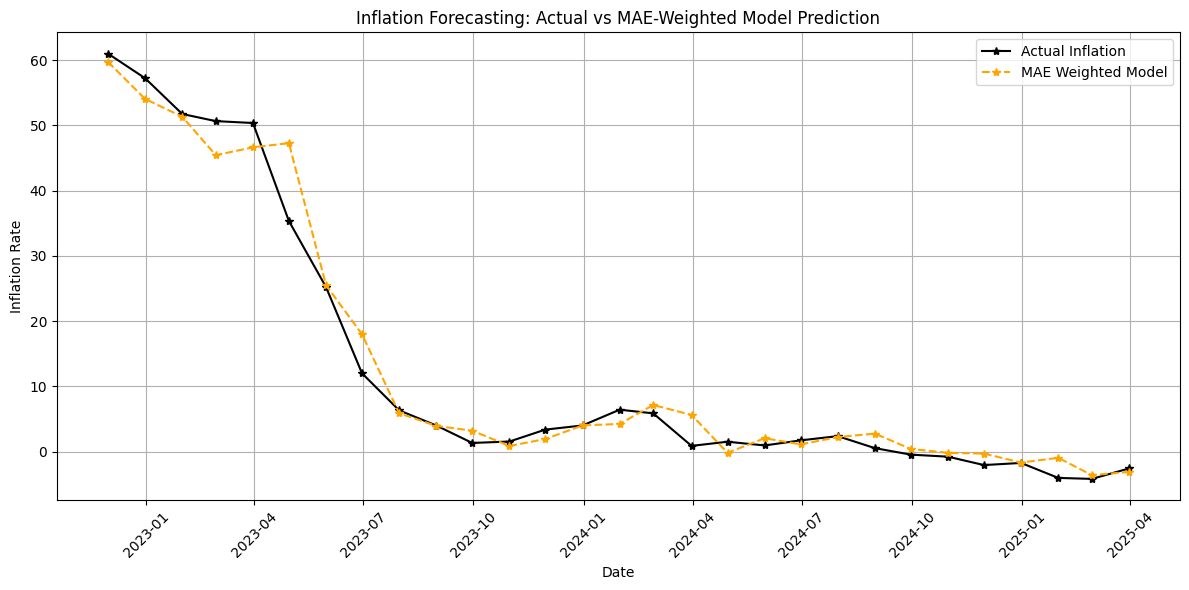

In [ ]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(12, 6))

# Plot actual inflation with default color and * marker
plt.plot(merged_df_pred.index, merged_df_pred['FNN_Actual Inflation'],
         label='Actual Inflation', marker='*', linestyle='-',color="Black")

# Plot MAE-weighted ensemble prediction with default color and * marker
plt.plot(merged_df_pred.index, merged_df_pred['Weighted_Ensemble_Predicted_MAE'],
         label='MAE Weighted Model', marker='*', linestyle='--',color="Orange")

# Add labels and title
plt.title('Inflation Forecasting: Actual vs MAE-Weighted Model Prediction')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
